In [1]:
import sys
sys.path.append("../Library/simulations")

import simulation_library
import potentials
import integrators
import data_logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import visuals

plt.style.use("ggplot")
%matplotlib inline
system_builder = simulation_library.SystemFactory()

# Dimer in LJ Bath


In [13]:
system_MD = system_builder.build_system(dim = 2, T = 1, rho = 0.7, N = 36, potential = "WCA", sigma = 1, epsilon = 1)
system_MD.add_bond(potentials.DoubleWellPotential1D(1.5, 25, 10, -0.5), system_MD.particles[0], system_MD.particles[1])
system_MD.bonds[0].particle_interactions = False

In [14]:
system_MD.get_integrator("verlet", dt = 0.001)
# system_MD.get_thermostat("anderson", T = 1, colisions = 0.01, freq = 100)

In [15]:
coordinate_logger_MD = data_logging.CoordinateLogger(system_MD, 50)
energy_logger_MD = data_logging.EnergyLogger(system_MD, 100)
temp_logger_MD = data_logging.TemperatureLogger(system_MD, 100)
dist_logger_MD = data_logging.DistanceLogger(system_MD, 100)
system_MD.registerObserver(coordinate_logger_MD)
system_MD.registerObserver(energy_logger_MD)
system_MD.registerObserver(temp_logger_MD)
system_MD.registerObserver(dist_logger_MD)

In [16]:
system_MD.run(10000)

Text(0, 0.5, 'Y axis')

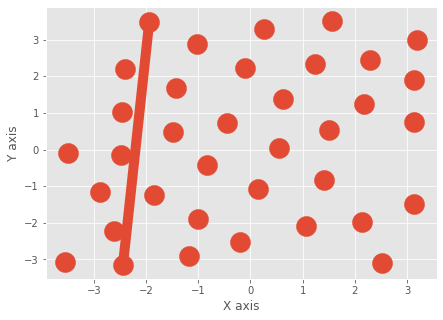

In [17]:
plt.figure(figsize = [7,5])
plt.scatter(*system_MD.get_coordinates().T, s = 400)
plt.plot([system_MD.particles[0].loc[0], system_MD.particles[1].loc[0]], [system_MD.particles[0].loc[1], system_MD.particles[1].loc[1]], lw = 10)
plt.xlabel("X axis")
plt.ylabel("Y axis")

(201, 36, 2)


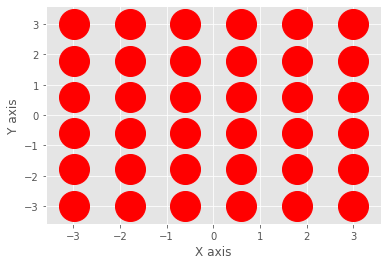

In [18]:
x_traj = np.array(coordinate_logger_MD.coordinates)
print(x_traj.shape)
visuals.make_2D_traj(x_traj, system_MD.box, markersize= 30, color = "red")

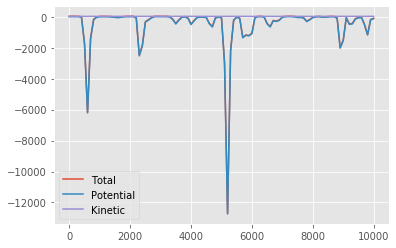

In [19]:
plt.plot(energy_logger_MD.steps, energy_logger_MD.H)
plt.plot(energy_logger_MD.steps, energy_logger_MD.U)
plt.plot(energy_logger_MD.steps, energy_logger_MD.K)
plt.legend(["Total", "Potential", "Kinetic"])

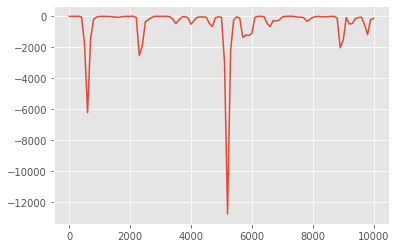

In [20]:
plt.plot(energy_logger_MD.steps, energy_logger_MD.U)

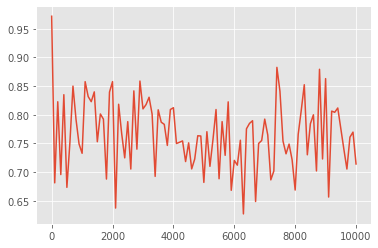

In [21]:
plt.plot(temp_logger_MD.steps, temp_logger_MD.T)

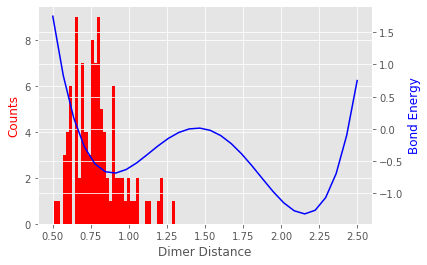

In [22]:
x = np.linspace(0.5, 2.5, 30)
y = np.array([system_MD.bonds[0].potential(x)]).reshape(-1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Dimer Distance")
ax1.set_ylabel("Counts", color = "red")
ax1.hist(np.array(dist_logger_MD.d).reshape(-1, 1), bins = 40, color = "red")
ax1.tick_params(axis='y')


ax2.plot(x,y, color = "blue")
ax2.set_ylabel("Bond Energy", color="blue")
ax2.tick_params(axis='y')

# Dimer in LJ Bath (Metropolis Sampling)

In [25]:
system_MC = system_builder.build_system(dim = 2, T = 1, rho = 1, N = 36, potential = "LJ-rep", sigma = 1, epsilon = 1, r_c = 2, boundary_conditions = "none")
system_MC.add_bond(potentials.DoubleWellPotential1D(1.5, 25, 10, -0.5), system_MC.particles[0], system_MC.particles[1])
system_builder.add_central_potential(system_MC, "harmonic_box", l_box = system_MC.box, k_box = 100)
system_MC.bonds[0].particle_interactions = False
system_MC.get_integrator("metropolis", temp = 1, sigma = 0.02, adjust_sigma = False)

In [26]:
coordinate_logger_MC = data_logging.CoordinateLogger(system_MC, 50)
energy_logger_MC = data_logging.EnergyLogger(system_MC, 100)
dist_logger_MC = data_logging.DistanceLogger(system_MC, 100)
system_MC.registerObserver(coordinate_logger_MC)
system_MC.registerObserver(energy_logger_MC)
system_MC.registerObserver(dist_logger_MC)

In [27]:
system_MC.run(10000)

Text(0, 0.5, 'Y axis')

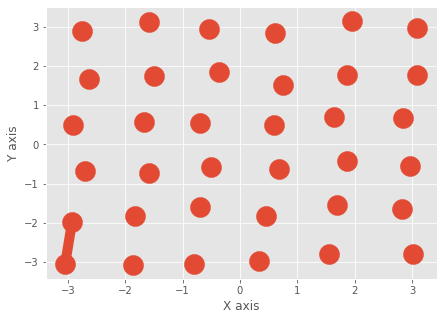

In [28]:
plt.figure(figsize = [7,5])
plt.scatter(*system_MC.get_coordinates().T, s = 400)
plt.plot([system_MC.particles[0].loc[0], system_MC.particles[1].loc[0]], [system_MC.particles[0].loc[1], system_MC.particles[1].loc[1]], lw = 10)
plt.xlabel("X axis")
plt.ylabel("Y axis")

(201, 36, 2)


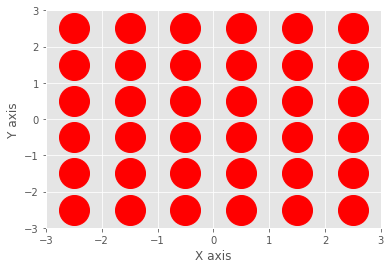

In [29]:
x_traj = np.array(coordinate_logger_MC.coordinates)
print(x_traj.shape)
visuals.make_2D_traj(x_traj, system_MC.box, markersize= 30, color = "red")

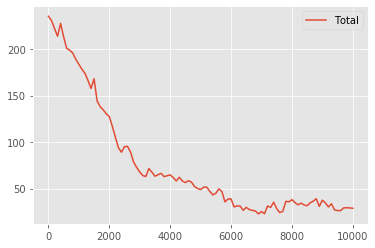

In [30]:
plt.plot(energy_logger_MC.steps, energy_logger_MC.H)
plt.legend(["Total", "Potential", "Kinetic"])

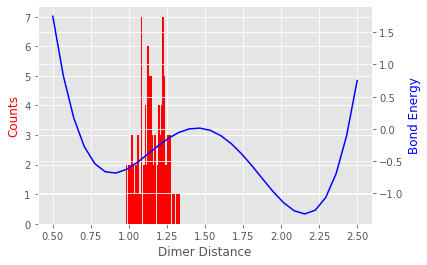

In [31]:
x = np.linspace(0.5, 2.5, 30)
y = np.array([system_MC.bonds[0].potential(x)]).reshape(-1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Dimer Distance")
ax1.set_ylabel("Counts", color = "red")
ax1.hist(np.array(dist_logger_MC.d).reshape(-1, 1), bins = 40, color = "red")
ax1.tick_params(axis='y')


ax2.plot(x,y, color = "blue")
ax2.set_ylabel("Bond Energy", color="blue")
ax2.tick_params(axis='y')

In [32]:
dist_logger_MC.d[-1]

array([1.06848972])

In [33]:
system_MC.integrator.sigma

0.02

# Dimer in LJ Bath w/o PBC

In [ ]:
system_MD2 = system_builder.build_system(dim = 2, T = 1, rho = 1, N = 36, potential = "LJ-rep", sigma = 1, epsilon = 1, r_c = 2, boundary_conditions = "none")
system_builder.add_central_potential(system_MD2, "harmonic_box", l_box = system_MD2.box, k_box = 100)
system_MD2.add_bond(potentials.DoubleWellPotential1D(1.5, 25, 10, -0.5), system_MD2.particles[0], system_MD2.particles[1])
system_MD2.bonds[0].particle_interactions = False

In [ ]:
system_MD2.get_integrator("verlet_neighbors", dt = 0.001, r_nl = 2.5)
system_MD2.get_thermostat("anderson", T = 1, colisions = 0.01, freq = 100)

In [ ]:
coordinate_logger_MD2 = data_logging.CoordinateLogger(system_MD2, 50)
energy_logger_MD2 = data_logging.EnergyLogger(system_MD2, 100)
temp_logger_MD2 = data_logging.TemperatureLogger(system_MD2, 100)
dist_logger_MD2 = data_logging.DistanceLogger(system_MD2, 100)
system_MD2.registerObserver(coordinate_logger_MD2)
system_MD2.registerObserver(energy_logger_MD2)
system_MD2.registerObserver(temp_logger_MD2)
system_MD2.registerObserver(dist_logger_MD2)

In [ ]:
system_MD2.run(100000)

In [ ]:
plt.figure(figsize = [7,5])
plt.scatter(*system_MD2.get_coordinates().T, s = 400)
plt.plot([system_MD2.particles[0].loc[0], system_MD2.particles[1].loc[0]], [system_MD2.particles[0].loc[1], system_MD2.particles[1].loc[1]], lw = 10)
plt.xlabel("X axis")
plt.ylabel("Y axis")

In [ ]:
x_traj = np.array(coordinate_logger_MD2.coordinates)
print(x_traj.shape)
visuals.make_2D_traj(x_traj, system_MD2.box, markersize= 30, color = "red")

In [ ]:
system_MD2.box

In [ ]:
plt.plot(energy_logger_MD2.steps, energy_logger_MD2.U)
plt.plot(energy_logger_MD2.steps, energy_logger_MD2.K)
plt.plot(energy_logger_MD2.steps, energy_logger_MD2.H)
plt.legend(["Total", "Potential", "Kinetic"])
plt.xlabel("Time Steps")
plt.ylabel("Energy")

In [ ]:
system_MD2.get_energy()

In [ ]:
x = np.linspace(0.5, 2.5, 30)
y = np.array([system_MD2.bonds[0].potential(x)]).reshape(-1)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Dimer Distance")
ax1.set_ylabel("Counts", color = "red")
ax1.hist(np.array(dist_logger_MD2.d).reshape(-1, 1), bins = 40, color = "red")
ax1.tick_params(axis='y')


ax2.plot(x,y, color = "blue")
ax2.set_ylabel("Bond Energy", color="blue")
ax2.tick_params(axis='y')